# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Lecture - generating a confounding variable

The prewatch material told a story about a hypothetical health condition where both the drug usage and overall health outcome were related to gender - thus making gender a confounding variable, obfuscating the possible relationship between the drug and the outcome.

Let's use Python to generate data that actually behaves in this fashion!

In [2]:
import random
dir(random)  # Reminding ourselves what we can do here

['BPF',
 'LOG4',
 'NV_MAGICCONST',
 'RECIP_BPF',
 'Random',
 'SG_MAGICCONST',
 'SystemRandom',
 'TWOPI',
 '_BuiltinMethodType',
 '_MethodType',
 '_Sequence',
 '_Set',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_acos',
 '_bisect',
 '_ceil',
 '_cos',
 '_e',
 '_exp',
 '_inst',
 '_itertools',
 '_log',
 '_pi',
 '_random',
 '_sha512',
 '_sin',
 '_sqrt',
 '_test',
 '_test_generator',
 '_urandom',
 '_warn',
 'betavariate',
 'choice',
 'choices',
 'expovariate',
 'gammavariate',
 'gauss',
 'getrandbits',
 'getstate',
 'lognormvariate',
 'normalvariate',
 'paretovariate',
 'randint',
 'random',
 'randrange',
 'sample',
 'seed',
 'setstate',
 'shuffle',
 'triangular',
 'uniform',
 'vonmisesvariate',
 'weibullvariate']

In [3]:
# Let's think of another scenario:
# We work for a company that sells accessories for mobile phones.
# They have an ecommerce site, and we are supposed to analyze logs
# to determine what sort of usage is related to purchases, and thus guide
# website development to encourage higher conversion.

# The hypothesis - users who spend longer on the site tend
# to spend more. Seems reasonable, no?

# But there's a confounding variable! If they're on a phone, they:
# a) Spend less time on the site, but
# b) Are more likely to be interested in the actual products!

# Let's use namedtuple to represent our data

from collections import namedtuple
# purchased and mobile are bools, time_on_site in seconds
User = namedtuple('User', ['purchased','time_on_site', 'mobile'])

example_user = User(False, 12, False)
print(example_user)

User(purchased=False, time_on_site=12, mobile=False)


In [4]:
# And now let's generate 1000 example users
# 750 mobile, 250 not (i.e. desktop)
# A desktop user has a base conversion likelihood of 10%
# And it goes up by 1% for each 15 seconds they spend on the site
# And they spend anywhere from 10 seconds to 10 minutes on the site (uniform)
# Mobile users spend on average half as much time on the site as desktop
# But have three times as much base likelihood of buying something

users = []

for _ in range(250):
  # Desktop users
  time_on_site = random.uniform(10, 600)
  purchased = random.random() < 0.1 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, False))
  
for _ in range(750):
  # Mobile users
  time_on_site = random.uniform(5, 300)
  purchased = random.random() < 0.3 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, True))
  
random.shuffle(users)
print(users[:10])

[User(purchased=False, time_on_site=127.77588865236308, mobile=True), User(purchased=False, time_on_site=503.42244532011483, mobile=False), User(purchased=True, time_on_site=217.56554336405858, mobile=True), User(purchased=False, time_on_site=213.36743503750017, mobile=True), User(purchased=False, time_on_site=211.5415059101627, mobile=True), User(purchased=False, time_on_site=173.1360579932905, mobile=True), User(purchased=True, time_on_site=596.0153005335471, mobile=False), User(purchased=True, time_on_site=197.33540596371435, mobile=True), User(purchased=True, time_on_site=92.35126253887279, mobile=True), User(purchased=False, time_on_site=111.89936137281731, mobile=True)]


In [5]:
# Let's put this in a dataframe so we can look at it more easily
import pandas as pd
user_data = pd.DataFrame(users)
user_data.head()

purchased  time_on_site  mobile
0      False    127.775889    True
1      False    503.422445   False
2       True    217.565543    True
3      False    213.367435    True
4      False    211.541506    True

In [6]:
# Let's use crosstabulation to try to see what's going on
pd.crosstab(user_data['purchased'], user_data['time_on_site'])

time_on_site  5.899480    6.044816    ...  591.025872  596.015301
purchased                             ...                        
False                  1           0  ...           0           0
True                   0           1  ...           1           1

[2 rows x 1000 columns]

In [7]:
# OK, that's not quite what we want
# Time is continuous! We need to put it in discrete buckets
# Pandas calls these bins, and pandas.cut helps make them

time_bins = pd.cut(user_data['time_on_site'], 5)  # 5 equal-sized bins
pd.crosstab(user_data['purchased'], time_bins)

TypeError: ignored

In [0]:
# We can make this a bit clearer by normalizing (getting %)
pd.crosstab(user_data['purchased'], time_bins, normalize='columns')

In [0]:
# That seems counter to our hypothesis
# More time on the site can actually have fewer purchases

# But we know why, since we generated the data!
# Let's look at mobile and purchased
pd.crosstab(user_data['purchased'], user_data['mobile'], normalize='columns')

In [0]:
# Yep, mobile users are more likely to buy things
# But we're still not seeing the *whole* story until we look at all 3 at once

# Live/stretch goal - how can we do that?

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

In [5]:
#Import the csv and make the first column the index so that we don't have two
df = pd.read_csv('https://raw.githubusercontent.com/ChanceDurr/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv', 
                 index_col='Unnamed: 0')
df.head()

age  weight  exercise_time
0   44     118            192
1   41     161             35
2   46     128            220
3   39     216             57
4   28     116            182

In [6]:
df.isnull().sum() #Check for NaN values

df.describe() #Check basic data values

age       weight  exercise_time
count  1200.000000  1200.000000    1200.000000
mean     48.396667   153.540833     134.910833
std      18.166802    35.132182      85.548895
min      18.000000   100.000000       0.000000
25%      33.000000   125.000000      65.000000
50%      48.000000   149.000000     122.000000
75%      64.000000   180.250000     206.000000
max      80.000000   246.000000     300.000000

In [1]:
#revert back to old pandas for crosstab
!pip install pandas==0.23.4

In [7]:
import pandas as pd
#Create a bin for ages, weight, and exercise time
time_bins = pd.cut(df.exercise_time, bins=5,
                   labels=['0-1 hours', '1-2 hours', '2-3 hours', '3-4 hours', '4-5 hours'])
age_bins = pd.cut(df.age, [0, 10, 20, 30, 40, 50, 60, 70, 80])

weight_bins = pd.cut(df.weight, [100, 120, 140, 160, 180, 200, 220, 240])

#create a pandas cross tab with age and time bins
pd.crosstab(age_bins, time_bins)

exercise_time  0-1 hours  1-2 hours  2-3 hours  3-4 hours  4-5 hours
age                                                                 
(10, 20]               9         18         10         15          8
(20, 30]              43         28         44         46         35
(30, 40]              44         46         34         41         48
(40, 50]              32         35         29         25         49
(50, 60]              28         42         36         32         46
(60, 70]              49         68         44         32          5
(70, 80]              73         79         26          1          0

In [8]:
#create a crosstab with weight and exercise time
pd.crosstab(weight_bins, time_bins)

exercise_time  0-1 hours  1-2 hours  2-3 hours  3-4 hours  4-5 hours
weight                                                              
(100, 120]            33         36         50         48         64
(120, 140]            32         55         48         58         76
(140, 160]            31         55         44         46         41
(160, 180]            36         63         34         29          6
(180, 200]            48         54         43          7          0
(200, 220]            58         47          3          0          0
(220, 240]            30          5          0          0          0

In [9]:
pd.crosstab(age_bins, weight_bins)

weight    (100, 120]  (120, 140]     ...      (200, 220]  (220, 240]
age                                  ...                            
(10, 20]          11          13     ...               5           0
(20, 30]          52          35     ...              14           5
(30, 40]          53          52     ...              20           4
(40, 50]          33          52     ...              12           2
(50, 60]          34          42     ...              19           1
(60, 70]          25          44     ...              18           8
(70, 80]          23          31     ...              20          15

[7 rows x 7 columns]

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

##1.  **What are the variable types in the data?**

*   Age - discrete
*   Weight - continuous, binned to discrete
*   Exercise - continuous, binned to discrete

##2.  What are the relationships between the variables?

*   As age increased amount of people working out longer times decreased
*   As weight increased amount of people working out longer times decreased
*   Their wasn't a huge correlation between age and weight

##3.  Which relationships are "real", and which spurious?

*   I'd say the age-exercise and weight-exercise were real and the age-weight was spurious


## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)

In [11]:
import numpy as np
#Create the array of data for a DataFrame
array = np.array([[2010, 2759, 114.9],
                  [2011, 2442, 163],
                  [2012, 2594, 227.8],
                  [2013, 2736, 307.4],
                  [2014, 3123, 397.4],
                  [2015, 3772, 486.7],
                  [2016, 4505, 583.8],
                  [2017, 5485, 673.4],
                  [2018, 6320, 759.3]])

df = pd.DataFrame(array, columns=['year', 'homeless', 'tvs'], dtype=int)
df.head()

year  homeless  tvs
0  2010      2759  114
1  2011      2442  163
2  2012      2594  227
3  2013      2736  307
4  2014      3123  397

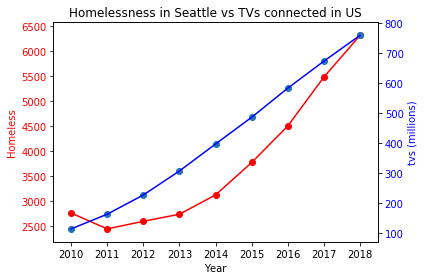

The Correlation is 94.72%


In [12]:
import matplotlib.pyplot as plot

fig, ax1 = plot.subplots()

#Set the X and Y labels and make all of the first Y values red
color = 'red'
ax1.set_title('Homelessness in Seattle vs TVs connected in US')
ax1.set_xlabel('Year')
ax1.set_ylabel('Homeless', color = color)
ax1.plot(df.year, df.homeless, color = color)
ax1.tick_params(axis='y', labelcolor=color)
plot.scatter(df.year, df.homeless, color = color)

#create another y value witht the same X
ax2 = ax1.twinx()

#Change the second y values to all blue
color ='blue'
ax2.set_ylabel('tvs (millions)', color = color)
ax2.plot(df.year, df.tvs, color = color)
ax2.tick_params(axis='y', labelcolor=color)
plot.scatter(df.year, df.tvs)


fig.tight_layout() #Use this to make it so second y ticks dont clip
plot.show()

corr = np.corrcoef(df.homeless, df.tvs)[0, 1] # Get the Correlation between the two
print(f'The Correlation is {(corr * 100).round(2)}%')